## Question 2:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
## import data
T = np.load('test_data.npy')
V = np.load('validation_data.npy')
S = np.load('train_data.npy')

For each n we calculate W based on below equation :

$\phi(x)=[1\;\;\phi^1(x)\;\;\phi^2(x)\;\;...\;\;\phi^n(x)]^T$

$ \Phi_{(n+1)\times m}=[\phi(x_1)\;\;\phi(x_2)\;\;...\phi(x_m)] \;\;\;\; \Rightarrow  \begin{cases}A_{(n+1)\times(n+1)}=\Phi.\Phi^T
\\ \beta_{(n+1)\times 1} = \Phi.Y \\ \end{cases} \Rightarrow W^*=A^{-1} . \beta \;\;\; , \;\;\; \hat{h}(x)=\;<\phi(x),W^*>$

$Y_{m\times 1}=\begin{bmatrix}y_1 & y_2  & ...& y_m\end{bmatrix}^T$

### 2.A : plot $L_s(h_n)$ versus n 

In [2]:
## we make a loop for each n 

Empirical_Risk=[]      # we put risk for each n in this array
W_all=[]               # W for different n's
for n in range(1,16):
    ## making phi vector witch has (n+1 rows)*(m columns)
    phi=np.ones((1,len(S)))
    for i in range(1,n+1):
        phi=np.vstack([phi , np.power(S[:,0],i) ])

    ## calc W for each n and put into W_all    
    A=np.matmul(phi,np.transpose(phi))
    beta=np.matmul(phi,S[:,1])
    W=np.matmul(np.linalg.inv(A),beta)
    W_all.append(W)
    ### clac empirical risk for each n and put into Empirical_Risk
    y_predict=np.matmul(W,phi)
    Empirical_Risk_n=np.sum(np.power(y_predict-S[:,1],2))/len(S)
    Empirical_Risk.append(Empirical_Risk_n)

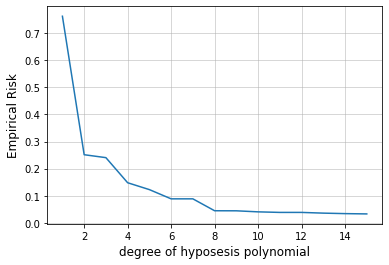

In [3]:
#### make figure 
plt.plot(range(1,16),Empirical_Risk); plt.grid(True,linewidth=0.5);
plt.ylabel('Empirical Risk',fontsize='large'); 
plt.xlabel('degree of hyposesis polynomial',fontsize='large'); plt.show()

### 2.b,c,d : plot $L_S(h_n)$ and $L_V(h_n)$ together and analyze them

In [4]:
True_Risk=[]
for n in range(1,16):
    phi=np.ones((1,len(V)))
    for i in range(1,n+1):
        phi=np.vstack([phi , np.power(V[:,0],i) ])
    W=W_all[i-1]
    y_predict=np.matmul(W,phi)
    True_Risk_n=np.sum(np.power(y_predict-V[:,1],2))/len(V)
    True_Risk.append(True_Risk_n)
    

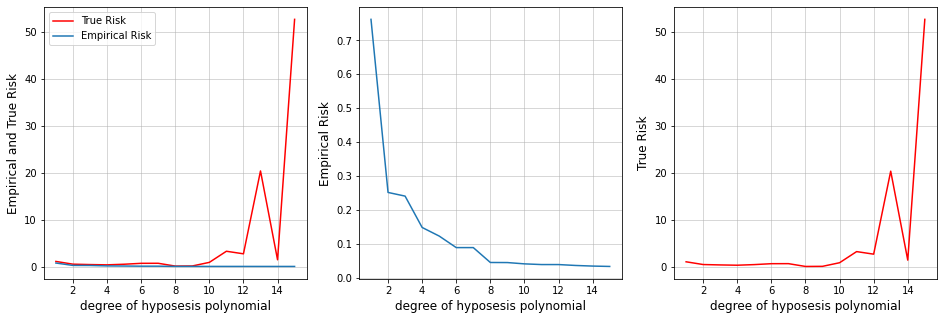

In [5]:
#### make figure 
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(range(1,16),True_Risk,'r'); plt.grid(True,linewidth=0.5); 
plt.ylabel('Empirical and True Risk',fontsize='large');plt.plot(range(1,16),Empirical_Risk); plt.legend(['True Risk','Empirical Risk'])
plt.xlabel('degree of hyposesis polynomial',fontsize='large')
plt.subplot(132)
plt.plot(range(1,16),Empirical_Risk); plt.grid(True,linewidth=0.5);
plt.ylabel('Empirical Risk',fontsize='large'); 
plt.xlabel('degree of hyposesis polynomial',fontsize='large')
plt.subplot(133)
plt.plot(range(1,16),True_Risk,'r'); plt.grid(True,linewidth=0.5);
plt.ylabel('True Risk',fontsize='large'); 
plt.xlabel('degree of hyposesis polynomial',fontsize='large'); plt.show()

<div style="direction:rtl">
    <b>ب)</b> 
علت اینکه $L_s (h_n)$  معیار درستی برای انتخاب n نیست اینست که این خطا با افزایش n همواره کاهش یافته و به ازای n≥m-1 برابر صفر میشود زیرا چند جمله ای با درجه n-1 دارای n  ضریب است و وقتی n=m-1 آنگاه با m ضریب بر تمام داده ها fit میشود و آنگاه خطای تجربی بر روی داده های آموزش صفر میشود اما از طرفی خطا برای داده های validation زیاد میشود لذا $L_s (h_n)$  معیار درستی برای انتخاب n نیست.
</div>

$
\\
$

<div style="direction:rtl">
  <b>ج)</b> 
    
    همانطور که توضیح داده شد با افزایش n مقدار $L_s (h_n)$ همواره کم میشود ، مقدار $L_V (h_n)$  با افزایش n در ابتدا کم شده ولی از جایی به بعد به شدت زیاد میشود که در آنجا وارد محدوده ی overfit شدن میشویم که خطا برای داده های train روند نزولی خود را دارد ولی برای داده های validation روند صعوعی پیدا کرده. علت زیاد شدن $L_V (h_n)$  هم اینست که مدل بیش از حد به داده های train فیت شده و لذا خطای زیادی برای داده های خارج از آن میدهد
  
</div>

$
\\
$
<div style="direction:rtl">
  <b>د)</b>
    با توجه به منحنی های بالا بهترین درجه برای چند جمله ای برابر <i><b>n=8</b></i> میباشد ، زیرا در این n مقدار $L_V (h_n)$  به کمینه خود رسیده و از آن بعد شروع به overfit شدن کرده است . برای بدست آوردن بهترین مقدار n  نمودار $L_V (h_n)$  در نظر گرفته شده است زیرا بر اساس نمودار $L_S (h_n)$ بهترین مقدار n برابر $n≥m-1$ است زیرا در این مقدار خطا صفر میشود ، لذا باید از روی $L_V (h_n)$ بهترین  n را پیدا کنیم ( البته برای نمایش بهتر میتوان از روی $L_V (h_n)$ و $L_s (h_n)$ که در یک نمودار رسم شده اند هم استفاده کرد)

</div>

 ***
 so we may choose `n=8` as our poly degree
 ***

### 2.e : calculating $L_T(h^*)$  as an estimation of $L(h^*)$ 

In [6]:
n=8
phi=np.ones((1,len(T)))
for i in range(1,n+1):
    phi=np.vstack([phi , np.power(T[:,0],i) ])
W=W_all[i-1]
y_predict=np.matmul(W,phi)
Risk=np.sum(np.power(y_predict-T[:,1],2))/len(T)


from IPython.display import display, Markdown
display(Markdown('$L_S (h_8) \;:\;$ %.5f'%Empirical_Risk[7]))
display(Markdown('$L_V (h_8)\;:\;$ %.5f'%True_Risk[7]))
display(Markdown('$L_T(h^*)\;:\;$ %.5f'%Risk))


$L_S (h_8) \;:\;$ 0.04482

$L_V (h_8)\;:\;$ 0.11129

$L_T(h^*)\;:\;$ 0.11791

<div style="direction:rtl">
  <b>و)</b>
به طور شهودی بهتر است که برای تخمین $L (h^*)$ از یک دیتاستی استفاده شود که مدل هیچگاه ندیده است و کاملا برای آن جدید باشد ، زیرا هدف ما train کردن سیستم و مدلی است که برای داده های جدید ورودی عمل کند و برای آنها دقت قابل قبولی داشته باشد ، حال اگر بیاییم از همان داده هایی که در جریان train شدن سیستم استفاده کرده ایم برای تخمین خطای واقعی استفاده کنیم ، چون مدل با استفاده از همین داده های train شده لذا مقدار به غلط کمتری از مقدار واقعی میدهد  و لذا تخمین درستی نیست ، پس در مسایل یک مجموعه داده به نام داده test کنار میگذرایم که در نهایت دقت  و خطای مدل را با آن بسنجیم چون مدل آنرا ندیده و کاملا برای آن جدید است و تقریب خوبی از خطای واقعی سیستم به ما میدهد. برای مثال در این سوال از $L_V (h_n)$  برای پیدا کردن بهترین مقدار n و از $L_S (h_n)$  برای پیدا کردن ضرایب استفاده شده بود ، حال اگر از همین داده ها برای بدست آوردن تخمینی از خطای واقعی استفاده کنیم ، مقدار درستی به ما نمیدهد

</div>